In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta


# Step1:
Data Cleaning , data import and reading.

In [3]:
uber=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/76b3b6a4-d87d-4e82-b1c3-3f6e10b9c076/Uber%20Request%20Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11/7/2016 7:25


In [5]:
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11-7-2016 7:25


In [6]:
uber['Request_time'] = pd.to_datetime(uber['Request timestamp']).dt.time
uber['Request_date'] = pd.to_datetime(uber['Request timestamp']).dt.date
uber['hour']=pd.to_datetime(uber['Request timestamp']).dt.hour
uber['day']=pd.to_datetime(uber['Request timestamp']).dt.day
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_time,Request_date,hour,day
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00,11:51:00,2016-11-07,11,7
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47,17:57:00,2016-11-07,17,7
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58,09:17:00,2016-12-07,9,7
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03,21:08:00,2016-12-07,21,7
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,08:33:16,2016-07-13,8,13
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,21:57:28,2016-07-13,21,13
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,06:15:32,2016-07-14,6,14
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,05:11:52,2016-07-15,5,15
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,17:57:27,2016-07-15,17,15
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11-7-2016 7:25,06:46:00,2016-11-07,6,7


In [7]:
uber['drop_date'] = pd.to_datetime(uber['Drop timestamp']).dt.date
uber['drop_time'] = pd.to_datetime(uber['Drop timestamp']).dt.time
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_time,Request_date,hour,day,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00,11:51:00,2016-11-07,11,7,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47,17:57:00,2016-11-07,17,7,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58,09:17:00,2016-12-07,9,7,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03,21:08:00,2016-12-07,21,7,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,08:33:16,2016-07-13,8,13,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,21:57:28,2016-07-13,21,13,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,06:15:32,2016-07-14,6,14,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,05:11:52,2016-07-15,5,15,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,17:57:27,2016-07-15,17,15,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11-7-2016 7:25,06:46:00,2016-11-07,6,7,2016-11-07,07:25:00


# 1.Visual identification of the most pressing problems for Uber.

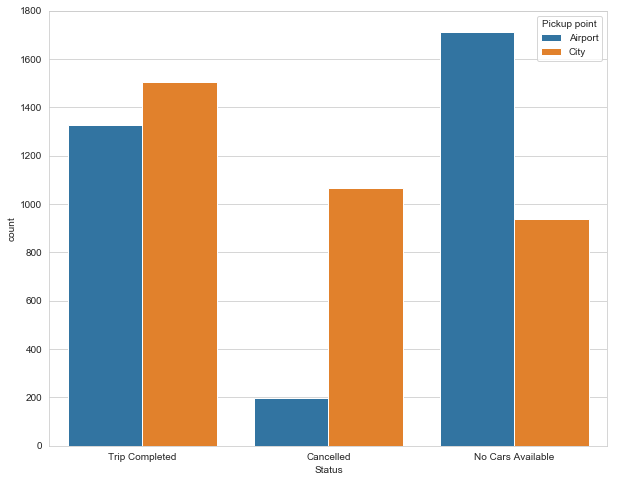

In [9]:
plt.figure(figsize=(10, 8))
sns.countplot(x="Status", hue= 'Pickup point',data=uber)
plt.show()

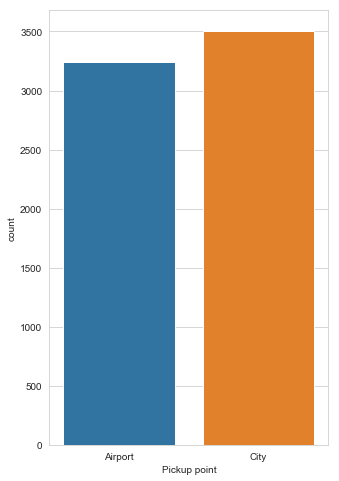

In [77]:
plt.figure(figsize=(5, 8))
sns.countplot(x="Pickup point", data=uber)
plt.show()

In [78]:
status = pd.pivot_table(uber,values='hour', index='Pickup point', columns='Status', aggfunc='count')
status.head()

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


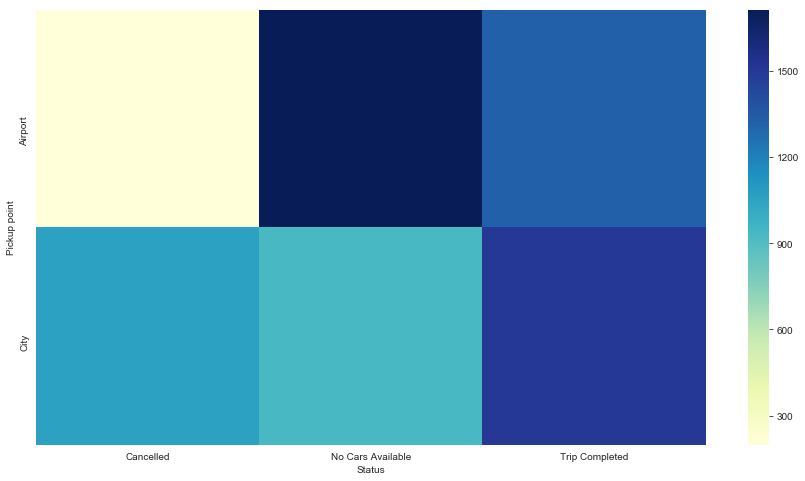

In [79]:
plt.figure(figsize=(15,8))

# heatmap with a color map of choice
sns.heatmap(status, cmap="YlGnBu")
plt.show()

In [80]:
ubernew = uber[['Pickup point','Status','hour','drop_time','Request_date','drop_date']]
ubernew

,Pickup point,Status,hour,drop_time,Request_date,drop_date
0,Airport,Trip Completed,11,13:00:00,2016-11-07,2016-11-07
1,Airport,Trip Completed,17,18:47:00,2016-11-07,2016-11-07
2,City,Trip Completed,9,09:58:00,2016-12-07,2016-12-07
3,Airport,Trip Completed,21,22:03:00,2016-12-07,2016-12-07
4,City,Trip Completed,8,09:25:47,2016-07-13,2016-07-13
5,Airport,Trip Completed,21,22:28:59,2016-07-13,2016-07-13
6,Airport,Trip Completed,6,07:13:15,2016-07-14,2016-07-14
7,Airport,Trip Completed,5,06:07:52,2016-07-15,2016-07-15
8,City,Trip Completed,17,18:50:51,2016-07-15,2016-07-15
9,City,Trip Completed,6,07:25:00,2016-11-07,2016-11-07


In [82]:
ubernew['Request_date'] = pd.to_datetime(ubernew['Request_date'])
ubernew['month']=ubernew['Request_date'].dt.month
ubernew['year'] = ubernew['Request_date'].dt.year
ubernew

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year
0,Airport,Trip Completed,11,13:00:00,2016-11-07,2016-11-07,11,2016
1,Airport,Trip Completed,17,18:47:00,2016-11-07,2016-11-07,11,2016
2,City,Trip Completed,9,09:58:00,2016-12-07,2016-12-07,12,2016
3,Airport,Trip Completed,21,22:03:00,2016-12-07,2016-12-07,12,2016
4,City,Trip Completed,8,09:25:47,2016-07-13,2016-07-13,7,2016
5,Airport,Trip Completed,21,22:28:59,2016-07-13,2016-07-13,7,2016
6,Airport,Trip Completed,6,07:13:15,2016-07-14,2016-07-14,7,2016
7,Airport,Trip Completed,5,06:07:52,2016-07-15,2016-07-15,7,2016
8,City,Trip Completed,17,18:50:51,2016-07-15,2016-07-15,7,2016
9,City,Trip Completed,6,07:25:00,2016-11-07,2016-11-07,11,2016


In [83]:
ubernew.fillna(0, inplace=True)
ubernew

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year
0,Airport,Trip Completed,11,13:00:00,2016-11-07,2016-11-07,11,2016
1,Airport,Trip Completed,17,18:47:00,2016-11-07,2016-11-07,11,2016
2,City,Trip Completed,9,09:58:00,2016-12-07,2016-12-07,12,2016
3,Airport,Trip Completed,21,22:03:00,2016-12-07,2016-12-07,12,2016
4,City,Trip Completed,8,09:25:47,2016-07-13,2016-07-13,7,2016
5,Airport,Trip Completed,21,22:28:59,2016-07-13,2016-07-13,7,2016
6,Airport,Trip Completed,6,07:13:15,2016-07-14,2016-07-14,7,2016
7,Airport,Trip Completed,5,06:07:52,2016-07-15,2016-07-15,7,2016
8,City,Trip Completed,17,18:50:51,2016-07-15,2016-07-15,7,2016
9,City,Trip Completed,6,07:25:00,2016-11-07,2016-11-07,11,2016


In [103]:
ubernew['time']=pd.cut(ubernew['hour'],[-1,6,12,16,20,24],labels=['early_morning','morning','after_noon','evening','night'])
ubernew

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
0,Airport,Trip Completed,11,13:00:00,2016-11-07,2016-11-07,11,2016,morning
1,Airport,Trip Completed,17,18:47:00,2016-11-07,2016-11-07,11,2016,evening
2,City,Trip Completed,9,09:58:00,2016-12-07,2016-12-07,12,2016,morning
3,Airport,Trip Completed,21,22:03:00,2016-12-07,2016-12-07,12,2016,night
4,City,Trip Completed,8,09:25:47,2016-07-13,2016-07-13,7,2016,morning
5,Airport,Trip Completed,21,22:28:59,2016-07-13,2016-07-13,7,2016,night
6,Airport,Trip Completed,6,07:13:15,2016-07-14,2016-07-14,7,2016,early_morning
7,Airport,Trip Completed,5,06:07:52,2016-07-15,2016-07-15,7,2016,early_morning
8,City,Trip Completed,17,18:50:51,2016-07-15,2016-07-15,7,2016,evening
9,City,Trip Completed,6,07:25:00,2016-11-07,2016-11-07,11,2016,early_morning


In [85]:
new = pd.pivot_table(ubernew,values='hour', index='Pickup point', columns='month', aggfunc='count')
new

month,7,11,12
Pickup point,,,
Airport,1893,661,684
City,2178,706,623


# Trip completed

In [106]:
completed = ubernew[ubernew["Status"] == 'Trip Completed'] 
completed

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
0,Airport,Trip Completed,11,13:00:00,2016-11-07,2016-11-07,11,2016,morning
1,Airport,Trip Completed,17,18:47:00,2016-11-07,2016-11-07,11,2016,evening
2,City,Trip Completed,9,09:58:00,2016-12-07,2016-12-07,12,2016,morning
3,Airport,Trip Completed,21,22:03:00,2016-12-07,2016-12-07,12,2016,night
4,City,Trip Completed,8,09:25:47,2016-07-13,2016-07-13,7,2016,morning
5,Airport,Trip Completed,21,22:28:59,2016-07-13,2016-07-13,7,2016,night
6,Airport,Trip Completed,6,07:13:15,2016-07-14,2016-07-14,7,2016,early_morning
7,Airport,Trip Completed,5,06:07:52,2016-07-15,2016-07-15,7,2016,early_morning
8,City,Trip Completed,17,18:50:51,2016-07-15,2016-07-15,7,2016,evening
9,City,Trip Completed,6,07:25:00,2016-11-07,2016-11-07,11,2016,early_morning


In [107]:
status_complete = completed.groupby(["year", "month","Pickup point","time"]).Status.count()
status_complete

year  month  Pickup point  time         
2016  7      Airport       early_morning    151
                           morning          207
                           after_noon        84
                           evening          185
                           night            130
             City          early_morning    191
                           morning          276
                           after_noon       125
                           evening          202
                           night            117
      11     Airport       early_morning     51
                           morning           81
                           after_noon        39
                           evening           72
                           night             38
             City          early_morning     61
                           morning          108
                           after_noon        44
                           evening           62
                           night             45

In [108]:
status_c=completed.groupby(["time","Pickup point"])["Pickup point"].count().reset_index(name="count").sort_values(by='count',ascending=False)
status_c

,time,Pickup point,count
3,morning,City,473
2,morning,Airport,381
7,evening,City,330
6,evening,Airport,312
1,early_morning,City,297
0,early_morning,Airport,269
5,after_noon,City,208
8,night,Airport,203
9,night,City,196
4,after_noon,Airport,162


In [109]:
status_c=status_c.sort_values('count', ascending=False)
status_c

,time,Pickup point,count
3,morning,City,473
2,morning,Airport,381
7,evening,City,330
6,evening,Airport,312
1,early_morning,City,297
0,early_morning,Airport,269
5,after_noon,City,208
8,night,Airport,203
9,night,City,196
4,after_noon,Airport,162


In [110]:
city_to_airport = status_c[status_c["Pickup point"] == 'City']
city_to_airport

,time,Pickup point,count
3,morning,City,473
7,evening,City,330
1,early_morning,City,297
5,after_noon,City,208
9,night,City,196


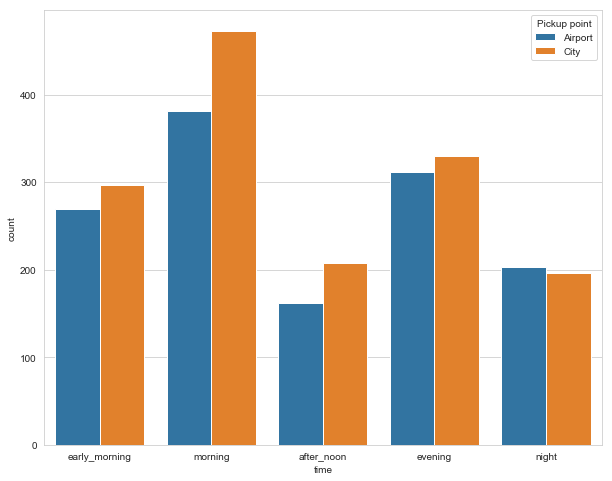

In [111]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time", hue='Pickup point',data=completed)
plt.show()

In [112]:
airport_to_city = status_c[status_c["Pickup point"] == 'Airport']
airport_to_city

,time,Pickup point,count
2,morning,Airport,381
6,evening,Airport,312
0,early_morning,Airport,269
8,night,Airport,203
4,after_noon,Airport,162


# cancelled

In [113]:
cancelled= ubernew[ubernew["Status"] == 'Cancelled'] 
cancelled

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
2831,City,Cancelled,6,0,2016-07-13,0,7,2016,early_morning
2832,City,Cancelled,17,0,2016-07-14,0,7,2016,evening
2833,Airport,Cancelled,20,0,2016-07-14,0,7,2016,evening
2834,City,Cancelled,10,0,2016-07-15,0,7,2016,morning
2835,Airport,Cancelled,19,0,2016-12-07,0,12,2016,evening
2836,Airport,Cancelled,20,0,2016-07-13,0,7,2016,evening
2837,City,Cancelled,8,0,2016-07-14,0,7,2016,morning
2838,Airport,Cancelled,19,0,2016-07-14,0,7,2016,evening
2839,City,Cancelled,4,0,2016-11-07,0,11,2016,early_morning
2840,City,Cancelled,10,0,2016-11-07,0,11,2016,morning


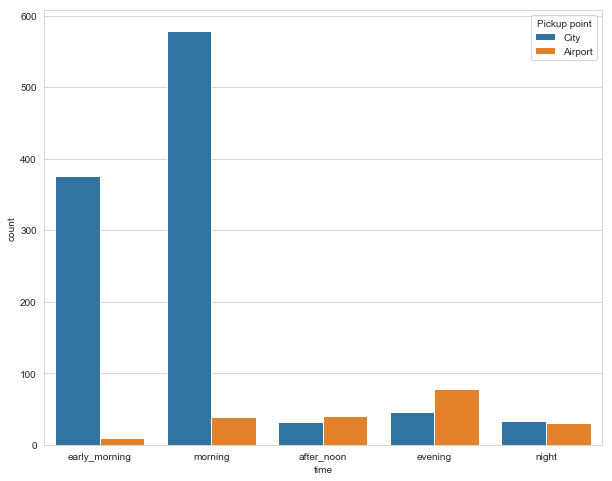

In [114]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time",hue="Pickup point", data=cancelled)
plt.show()

In [115]:
status_ca=cancelled.groupby(["time","Pickup point"])["Pickup point"].count().reset_index(name="count").sort_values(by='count',ascending=False)
status_ca

,time,Pickup point,count
3,morning,City,579
1,early_morning,City,376
6,evening,Airport,78
7,evening,City,46
4,after_noon,Airport,40
2,morning,Airport,39
9,night,City,33
5,after_noon,City,32
8,night,Airport,31
0,early_morning,Airport,10


In [116]:
city_to_airport = status_ca[status_ca["Pickup point"] == 'City']
city_to_airport

,time,Pickup point,count
3,morning,City,579
1,early_morning,City,376
7,evening,City,46
9,night,City,33
5,after_noon,City,32


In [117]:
airport_to_city = status_ca[status_ca["Pickup point"] == 'Airport']
airport_to_city

,time,Pickup point,count
6,evening,Airport,78
4,after_noon,Airport,40
2,morning,Airport,39
8,night,Airport,31
0,early_morning,Airport,10


# No cars available

In [118]:
no_cars= ubernew[ubernew["Status"] == 'No Cars Available'] 
no_cars

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
4095,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4096,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4097,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4098,Airport,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4099,Airport,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4100,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4101,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4102,City,No Cars Available,0,0,2016-11-07,0,11,2016,early_morning
4103,City,No Cars Available,1,0,2016-11-07,0,11,2016,early_morning
4104,Airport,No Cars Available,1,0,2016-11-07,0,11,2016,early_morning


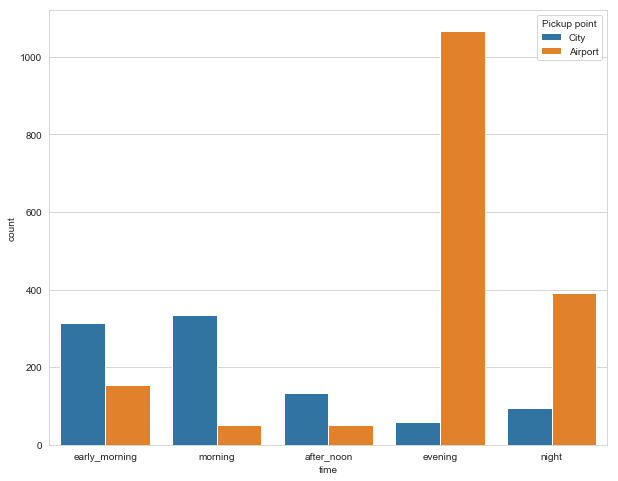

In [119]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time",hue='Pickup point', data=no_cars)
plt.show()

In [120]:
status_no_car=no_cars.groupby(["time","Pickup point"])["Pickup point"].count().reset_index(name="count").sort_values(by='count',ascending=False)
status_no_car

,time,Pickup point,count
6,evening,Airport,1067
8,night,Airport,390
3,morning,City,335
1,early_morning,City,314
0,early_morning,Airport,155
5,after_noon,City,134
9,night,City,94
7,evening,City,60
2,morning,Airport,51
4,after_noon,Airport,50


In [121]:
city_to_airport = status_no_car[status_no_car["Pickup point"] == 'City']
city_to_airport

,time,Pickup point,count
3,morning,City,335
1,early_morning,City,314
5,after_noon,City,134
9,night,City,94
7,evening,City,60


In [122]:
airport_to_city = status_no_car[status_no_car["Pickup point"] == 'Airport']
airport_to_city

,time,Pickup point,count
6,evening,Airport,1067
8,night,Airport,390
0,early_morning,Airport,155
2,morning,Airport,51
4,after_noon,Airport,50


# Gap data( no booking)

In [123]:
gap=ubernew[ubernew["Status"] != 'Trip Completed']
gap

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
2831,City,Cancelled,6,0,2016-07-13,0,7,2016,early_morning
2832,City,Cancelled,17,0,2016-07-14,0,7,2016,evening
2833,Airport,Cancelled,20,0,2016-07-14,0,7,2016,evening
2834,City,Cancelled,10,0,2016-07-15,0,7,2016,morning
2835,Airport,Cancelled,19,0,2016-12-07,0,12,2016,evening
2836,Airport,Cancelled,20,0,2016-07-13,0,7,2016,evening
2837,City,Cancelled,8,0,2016-07-14,0,7,2016,morning
2838,Airport,Cancelled,19,0,2016-07-14,0,7,2016,evening
2839,City,Cancelled,4,0,2016-11-07,0,11,2016,early_morning
2840,City,Cancelled,10,0,2016-11-07,0,11,2016,morning


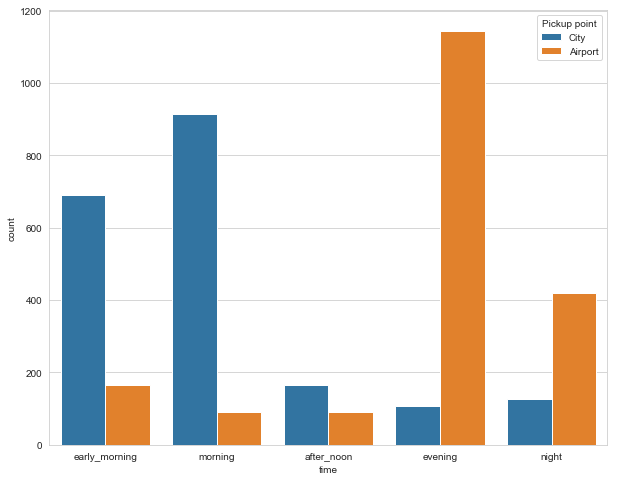

In [124]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time",hue='Pickup point', data=gap)
plt.show()

In [125]:
city_to_airport_gap = gap[gap["Pickup point"] == 'City']
city_to_airport_gap

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
2831,City,Cancelled,6,0,2016-07-13,0,7,2016,early_morning
2832,City,Cancelled,17,0,2016-07-14,0,7,2016,evening
2834,City,Cancelled,10,0,2016-07-15,0,7,2016,morning
2837,City,Cancelled,8,0,2016-07-14,0,7,2016,morning
2839,City,Cancelled,4,0,2016-11-07,0,11,2016,early_morning
2840,City,Cancelled,10,0,2016-11-07,0,11,2016,morning
2842,City,Cancelled,7,0,2016-07-14,0,7,2016,morning
2843,City,Cancelled,15,0,2016-11-07,0,11,2016,after_noon
2846,City,Cancelled,6,0,2016-07-14,0,7,2016,early_morning
2847,City,Cancelled,9,0,2016-07-14,0,7,2016,morning


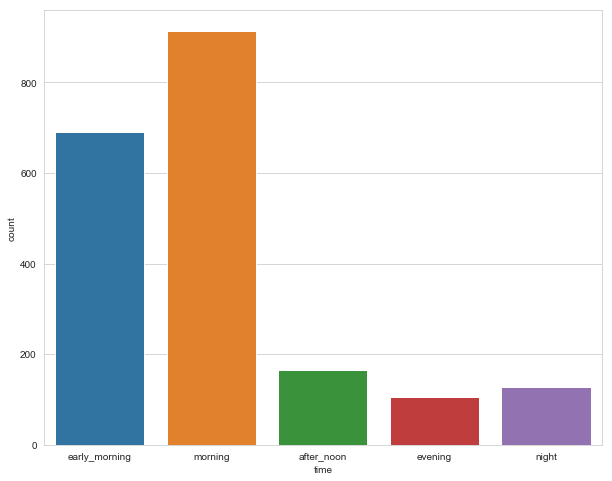

In [130]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time", data=city_to_airport_gap)
plt.show()

In [131]:
airport_to_city_gap = gap[gap["Pickup point"] == 'Airport']
airport_to_city_gap

,Pickup point,Status,hour,drop_time,Request_date,drop_date,month,year,time
2833,Airport,Cancelled,20,0,2016-07-14,0,7,2016,evening
2835,Airport,Cancelled,19,0,2016-12-07,0,12,2016,evening
2836,Airport,Cancelled,20,0,2016-07-13,0,7,2016,evening
2838,Airport,Cancelled,19,0,2016-07-14,0,7,2016,evening
2841,Airport,Cancelled,9,0,2016-12-07,0,12,2016,morning
2844,Airport,Cancelled,21,0,2016-11-07,0,11,2016,night
2845,Airport,Cancelled,20,0,2016-07-13,0,7,2016,evening
2855,Airport,Cancelled,21,0,2016-12-07,0,12,2016,night
2868,Airport,Cancelled,12,0,2016-07-14,0,7,2016,morning
2874,Airport,Cancelled,21,0,2016-07-13,0,7,2016,night


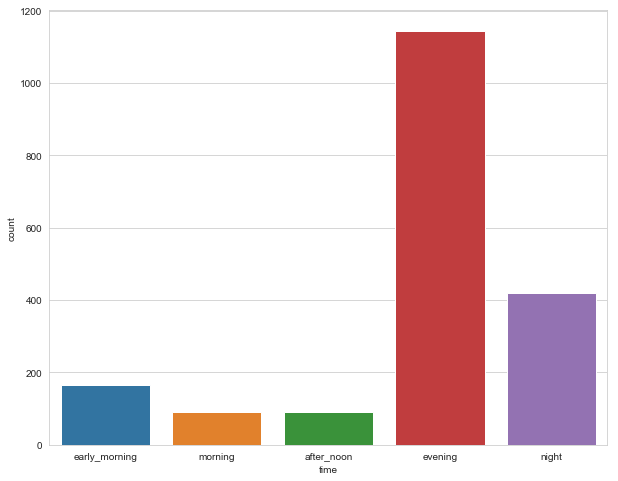

In [132]:
plt.figure(figsize=(10, 8))
sns.countplot(x="time", data=airport_to_city_gap)
plt.show()

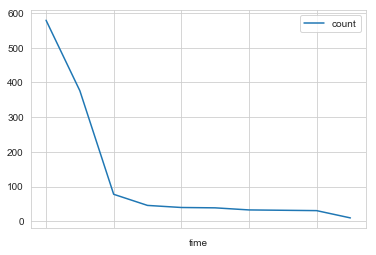

In [133]:
status_ca.plot(x="time", y="count")
plt.show()